In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
plt.rcParams["figure.dpi"] = 150

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
font_name = font_manager.FontProperties(fname="C:/windows/fonts/a고딕14.ttf").get_name()
plt.rcParams["font.family"] = font_name

import warnings
warnings.filterwarnings("ignore")

In [2]:
pal = ['#303C55', '#E47F2D', '#FBB243', '#F9CA18', '#4F596E','#747B86']

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# 전처리 및 탐색

In [3]:
df = pd.read_csv("dataset/data_label_최종.csv", encoding='utf-8-sig', index_col=0)
df.head()

,sentiment,quality/performance,price/event,delivery/service,design/appearance,text
0,1,0,0,1,0,배공빠르고 굿
1,0,0,0,1,0,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,1,1,1,0,0,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...
3,0,0,0,1,0,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...
4,1,0,0,0,1,민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [6]:
df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")  #정규 표현식 수행
df['text'].replace('', np.nan, inplace=True)  #비어 있는 행은 null값으로 처리
df.dropna(how='any', inplace=True)  #null 값 제거
df.drop_duplicates(subset = ['text'], inplace=True) #중복된 행 제거

In [7]:
from ckonlpy.tag import Twitter
twi = Twitter()

words = [('강추','Noun'), ('비추','Noun'), ('가성비','Noun'),
         ('재구매','Noun'), ('엉성', 'Noun'), ('핏', 'Noun'), ('타이트','Noun')]

for word in words:
    name, poomsa = word
    twi.add_dictionary(name, poomsa)

In [8]:
stopwords = ['의', '가', '이', '은', '들', '는', '과', '도', '를', '으로', '자', '에', '고', '세요', '니다', '입니다',
             '하다', '을', '이다', '다', '것', '로', '에서', '그', '인', '서', '네요', '음', '임', '랑',
             '게', '요', '에게', '엔', '이고', '네', '이네', '거', '예요', '이에요', '어요', '어서', '여요', '하여']

text_token = []
for sentence in tqdm(df['text']):
    tmp = []
    tmp = twi.morphs(sentence, stem=True, norm=True)  #토큰화
    tmp = [word for word in tmp if not word in stopwords]  #불용어 제거
    text_token.append(tmp)

100%|██████████████████████████████████████████████████████████████████████████| 199289/199289 [50:04<00:00, 66.33it/s]


In [9]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_token)
print(tokenizer.word_index)

{'좋다': 1, '너무': 2, '배송': 3, '보다': 4, '하고': 5, '있다': 6, '같다': 7, '자다': 8, '안': 9, '먹다': 10, '재구매': 11, '않다': 12, '없다': 13, '한': 14, '구매': 15, '해': 16, '되다': 17, '해서': 18, '오다': 19, '쓰다': 20, '사용': 21, '사다': 22, '그냥': 23, '들다': 24, '빠르다': 25, '제품': 26, '가격': 27, '생각': 28, '지만': 29, '좀': 30, '받다': 31, '주문': 32, '만족': 33, '잘': 34, '맛': 35, '만': 36, '더': 37, '사이즈': 38, '많이': 39, '별로': 40, '때': 41, '나': 42, 'ㅠㅠ': 43, '못': 44, '개': 45, '맛있다': 46, '포장': 47, '써다': 48, '크다': 49, '니': 50, '다른': 51, '맞다': 52, '작다': 53, '저렴': 54, '넘다': 55, '괜찮다': 56, '싸다': 57, 'ㅠ': 58, '하': 59, '상품': 60, '안되다': 61, '아주': 62, '냄새': 63, '부분': 64, '정말': 65, '이쁘다': 66, '하나': 67, '그렇다': 68, '많다': 69, '딱': 70, '면': 71, '감사': 72, '려고': 73, '이라': 74, '인데': 75, 'ㅎㅎ': 76, '시키다': 77, '나다': 78, '라': 79, '예쁘다': 80, '끄다': 81, '버리다': 82, '진짜': 83, '제': 84, '저': 85, '두': 86, '지': 87, '아니': 88, '조금': 89, '히': 90, '모르다': 91, '아': 92, '보': 93, '또': 94, '느낌': 95, '편하다': 96, '반품': 97, '데': 98, '쓸다': 99, '에요': 100, 'ㅜㅜ': 101, '구입': 102,

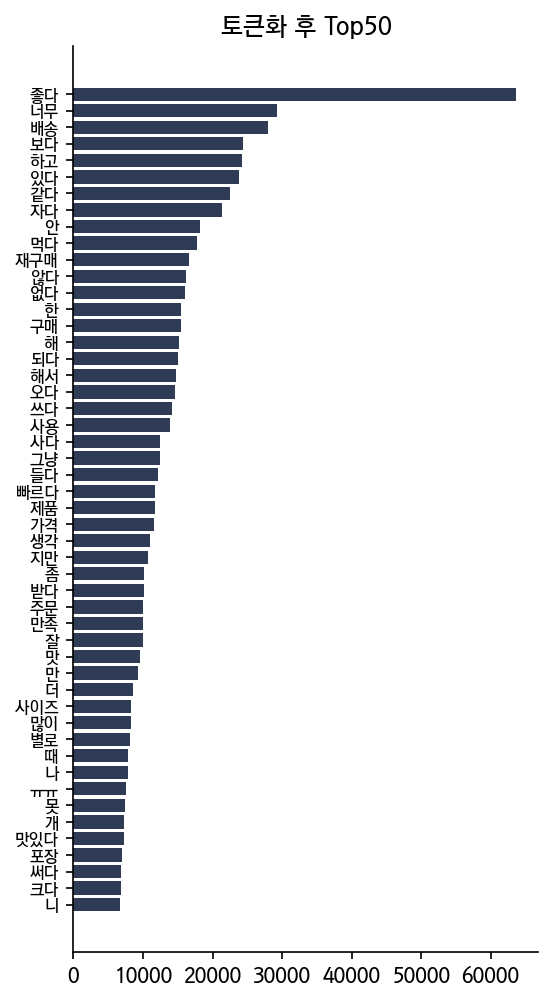

In [15]:
words  = sorted(tokenizer.word_counts.items(), key=lambda x:x[1])
x = [i[0] for i in words[-50:]]
y = [i[1] for i in words[-50:]]

fig, ax = plt.subplots(figsize=(4,8))
ax.barh(x, y, color=pal[0])
plt.yticks(fontsize=8)
plt.title("토큰화 후 Top50")
simpleaxis(ax)

(-0.5, 1599.5, 799.5, -0.5)

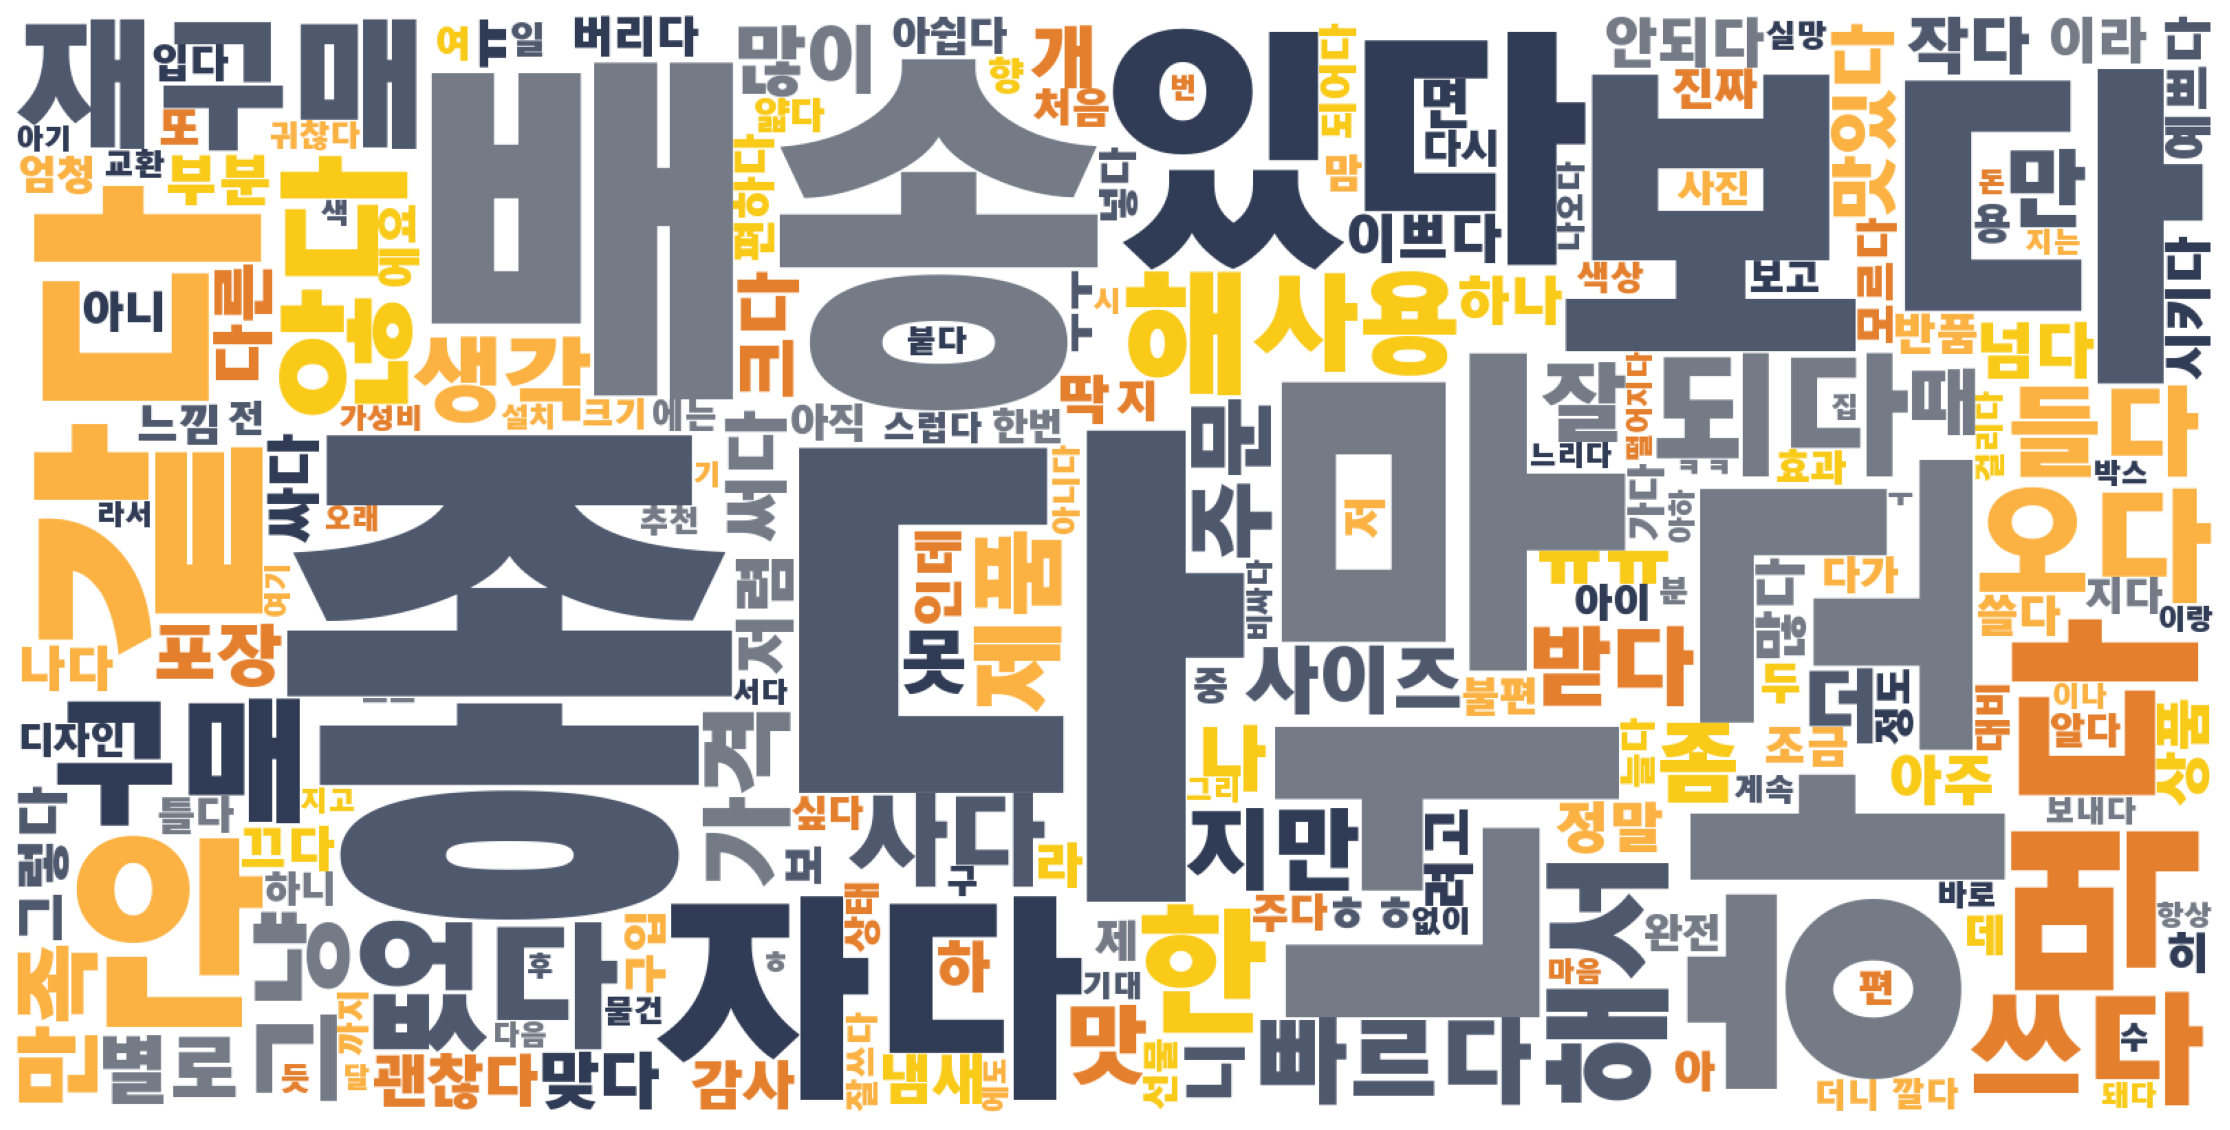

In [17]:
from wordcloud import WordCloud
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    i = random.randint(0,5)
    return pal[i]

wc = WordCloud(font_path="C:/windows/fonts/a말머리5.ttf", background_color='white', 
              width=1600, height=800, color_func=grey_color_func).generate_from_frequencies(tokenizer.word_counts)
plt.figure(figsize=(15, 10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')

In [10]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 44152
등장 빈도가 2번 이하인 희귀 단어의 수: 26822
단어 집합에서 희귀 단어의 비율: 60.74922993295887
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.2691737130692322


In [11]:
# 빈도수 3이하인 단어 제거하고 0 추가한 개수 = vocab_size
vocab_size = total_cnt - rare_cnt + 1 
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 17331


In [12]:
tokenizer = Tokenizer(num_words = vocab_size) 
tokenizer.fit_on_texts(text_token)

In [47]:
w = tokenizer.word_index
w = pd.DataFrame({'words':w.keys(), 'idx':w.values()}).set_index("idx")
w.iloc[:vocab_size, :].to_csv("dataset/word_index.csv", encoding='utf-8-sig')

리뷰의 최대 길이 : 58
리뷰의 평균 길이 : 12.36651295354987


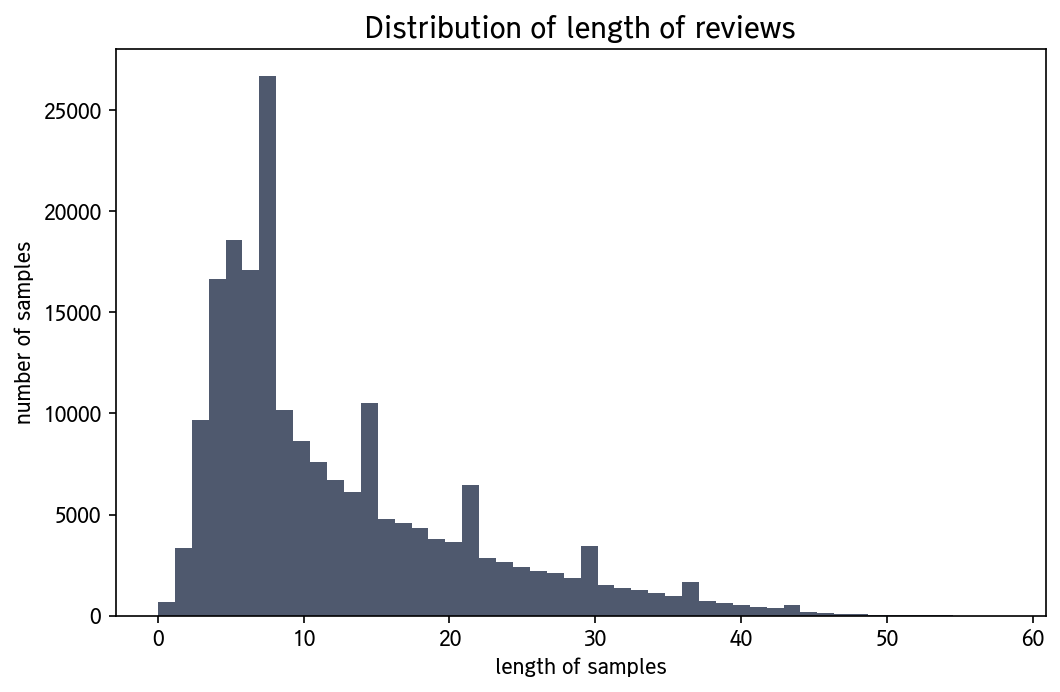

In [14]:
X = tokenizer.texts_to_sequences(text_token)
print('리뷰의 최대 길이 :',max(len(l) for l in X))
print('리뷰의 평균 길이 :',sum(map(len, X))/len(X))

plt.figure(figsize=(8,5))
plt.hist([len(s) for s in X], bins=50, color=pal[4])
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.title('Distribution of length of reviews', fontsize=14)
plt.show()

In [15]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 35
below_threshold_len(max_len, X)

전체 샘플 중 길이가 35 이하인 샘플의 비율: 97.29337795864298


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen = max_len)
y = np.array(df.iloc[:,:5])

In [17]:
X

array([[    0,     0,     0, ..., 11842,    25,   273],
       [    0,     0,     0, ...,   155,  1599,  1868],
       [    0,     0,     0, ...,     5,   169,   245],
       ...,
       [    0,     0,     0, ...,   101,   372,   421],
       [    0,     0,     0, ...,  1688,    17,   323],
       [    0,     0,     0, ...,    76,     3,   205]])

In [18]:
y

array([[1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0],
       ...,
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0]], dtype=int64)

---

# 모델링

In [22]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Dense, GRU, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [24]:
label_names = df.columns[:5] #label 종류
n_label = len(label_names)

y_train_list = {label_names[i]:y_train[:,i] for i in range(n_label)}
y_test_list = {label_names[i]:y_test[:,i] for i in range(n_label)}

y_train_list

{'sentiment': array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
 'quality/performance': array([0, 1, 0, ..., 1, 1, 1], dtype=int64),
 'price/event': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'delivery/service': array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 'design/appearance': array([1, 1, 0, ..., 0, 0, 0], dtype=int64)}

In [26]:
import tensorflow.keras.backend as K

def F1score(y_true, y_pred):
    eps = K.epsilon()
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    real_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    pred_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = true_positives / (real_positives + eps)
    precision = true_positives / (pred_positives + eps)
    f1_score = 2 * (recall * precision) / (recall + precision + eps)
    return f1_score

In [20]:
def SimpleGRU():
    input_layer = Input(shape=(max_len,))
    embedding_text = Embedding(vocab_size, 256)(input_layer)
    x = GRU(128)(embedding_text)
    x = Dropout(0.5)(x)
    output_layers = [Dense(1, activation="sigmoid", name=label_names[i])(x) for i in range(y.shape[1])]

    model = Model(inputs=input_layer, outputs=output_layers)
    model.compile(loss=['binary_crossentropy']*n_label, optimizer='rmsprop', metrics=[F1score])
    
    return model

In [27]:
model = SimpleGRU()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 35)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 256)      4436736     input_3[0][0]                    
__________________________________________________________________________________________________
gru_2 (GRU)                     (None, 128)          148224      embedding_2[0][0]                
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 128)          0           gru_2[0][0]                      
____________________________________________________________________________________________

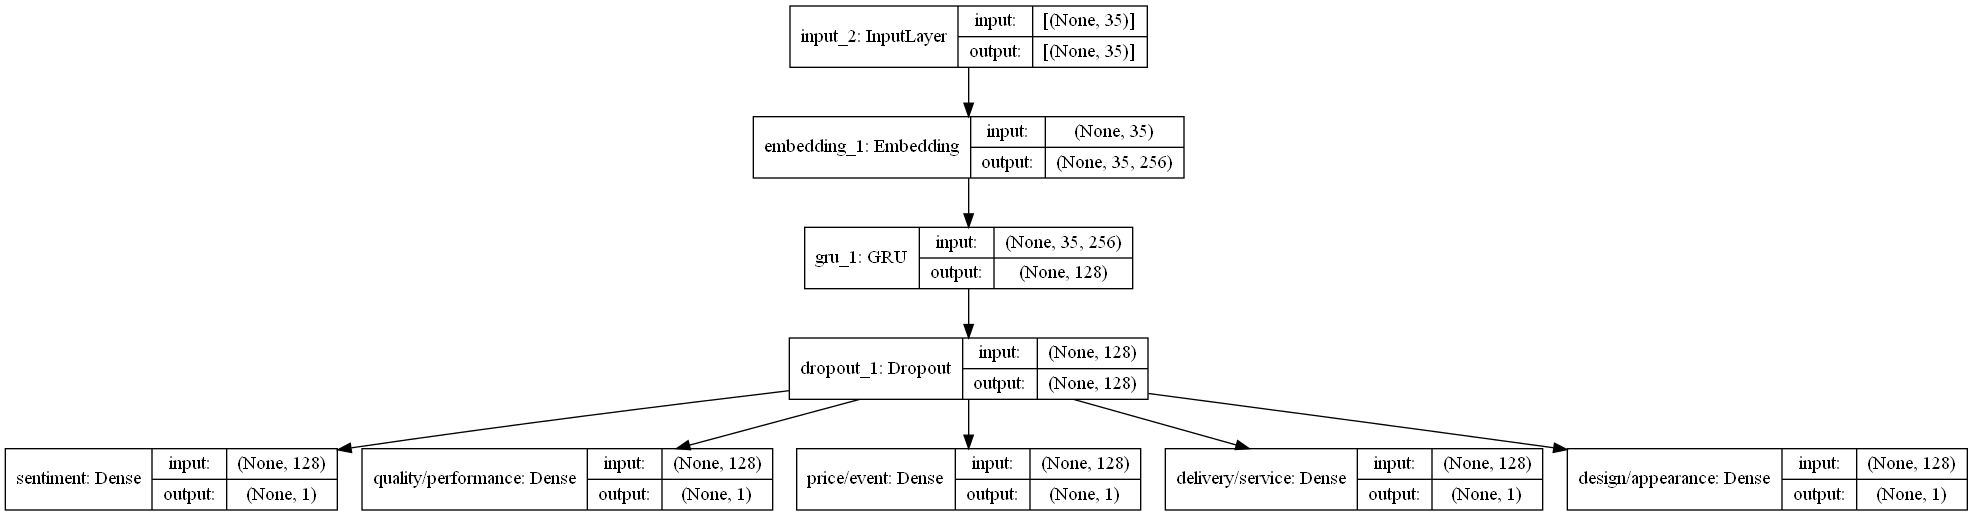

In [34]:
plot_model(model, show_shapes=True)

In [36]:
callback_list = [EarlyStopping(monitor='val_loss', patience=4),
                ModelCheckpoint(filepath='model1.h5', monitor='val_loss', save_best_only=True)]
history1 = model.fit(X_train, y_train_list, epochs=20, batch_size=60, validation_split=0.1, callbacks=callback_list)

Epoch 1/20
2392/2392 [==============================] - 72s 28ms/step - loss: 1.1497 - sentiment_loss: 0.3695 - quality/performance_loss: 0.2903 - price/event_loss: 0.1175 - delivery/service_loss: 0.1292 - design/appearance_loss: 0.2432 - sentiment_F1score: 0.8449 - quality/performance_F1score: 0.9063 - price/event_F1score: 0.7607 - delivery/service_F1score: 0.8383 - design/appearance_F1score: 0.7104 - val_loss: 0.4751 - val_sentiment_loss: 0.2601 - val_quality/performance_loss: 0.0652 - val_price/event_loss: 0.0236 - val_delivery/service_loss: 0.0315 - val_design/appearance_loss: 0.0947 - val_sentiment_F1score: 0.9036 - val_quality/performance_F1score: 0.9888 - val_price/event_F1score: 0.9751 - val_delivery/service_F1score: 0.9862 - val_design/appearance_F1score: 0.9345
Epoch 2/20
2392/2392 [==============================] - 65s 27ms/step - loss: 0.4493 - sentiment_loss: 0.2495 - quality/performance_loss: 0.0664 - price/event_loss: 0.0205 - delivery/service_loss: 0.0292 - design/appea

In [41]:
best_model = load_model('model1.h5', custom_objects = {'F1score':F1score})
best_model.evaluate(X_test, y_test_list, batch_size=60)

665/665 [==============================] - 5s 7ms/step - loss: 0.4103 - sentiment_loss: 0.2328 - quality/performance_loss: 0.0550 - price/event_loss: 0.0165 - delivery/service_loss: 0.0264 - design/appearance_loss: 0.0797 - sentiment_sentiment_F1score: 0.9115 - quality/performance_quality/performance_F1score: 0.9903 - price/event_price/event_F1score: 0.9874 - delivery/service_delivery/service_F1score: 0.9886 - design/appearance_design/appearance_F1score: 0.9455


[0.4102814495563507,
 0.23277169466018677,
 0.05498204380273819,
 0.016451003029942513,
 0.026363756507635117,
 0.07971274852752686,
 0.9114562273025513,
 0.9903451800346375,
 0.987377405166626,
 0.9885985255241394,
 0.9454994797706604]

In [44]:
def history_to_value(history, n_label):
    history_out = pd.DataFrame(history.history)
    epochs = history_out.shape[0]
    history_out = history_out.drop('loss', axis=1).stack().reset_index()
    history_out['F1score'] = history_out['level_1'].apply(lambda x: 1 if x.split('_')[-1] =='F1score' else 0)
    history_out['label_kind'] = history_out['level_1'].apply(lambda x: x.split('_')[-2])
    history_out['data'] = history_out['level_1'].apply(lambda x: 'validation' if len(x.split('_')) == 3 else 'train')
    history_out = history_out[history_out['F1score'] == 1][[0, 'label_kind', 'data']].rename(columns={0:'values'}).reset_index(drop=True)
    history_out.sort_values(by=['label_kind', 'data'], inplace=True)
    history_out['epochs'] = list(range(1,epochs+1)) * n_label * 2
    return history_out

def plotDF(history, n_label):
    history_out = history_to_value(history, n_label)
    fig = sns.relplot(data=history_out, x="epochs", y="values", hue="data", col="label_kind", linewidth=2.5, kind='line', col_wrap=3,
                      marker='o', palette=pal[:2], height=3, aspect=0.8)
    plt.legend(loc='lower right')
    leg = fig._legend
    leg.set_bbox_to_anchor([0.9,0.3]) 
    fig.set(ylim=(0.6, 1), ylabel='F1 score')
    plt.tight_layout()

No handles with labels found to put in legend.


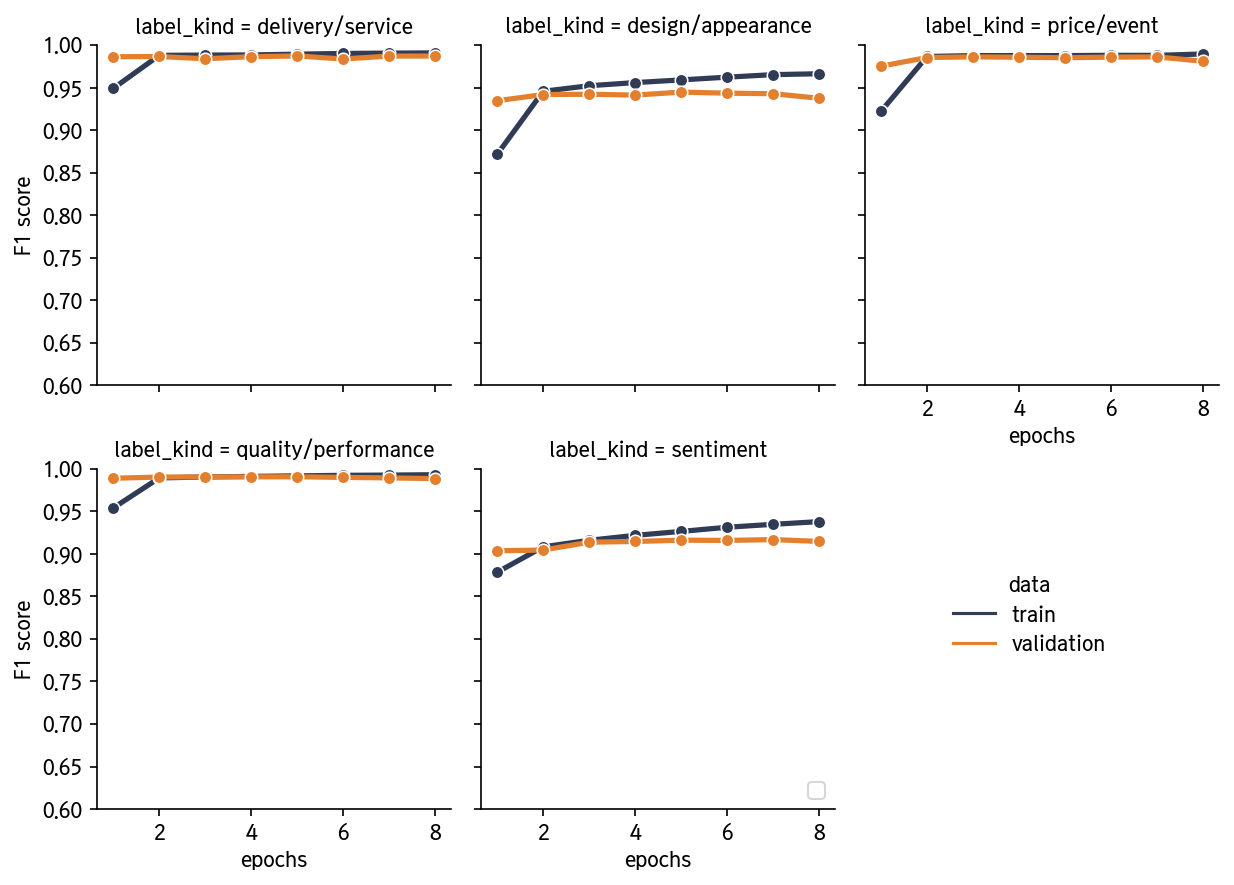

In [46]:
plotDF(history1, n_label)

---

# Best Model로 리뷰 내용에 대한 Category, Sentiment 분류 프로그램 만들기

In [28]:
best_model = load_model('model1.h5', custom_objects = {'F1score':F1score})
word_index = tokenizer.word_index

In [29]:
# ------------------ 토큰화 tagger 로드 -------------------
from ckonlpy.tag import Twitter
twi = Twitter()
stopwords = ['의', '가', '이', '은', '들', '는', '과', '도', '를', '으로', '자', '에', '고', '세요', '니다', '입니다',
             '하다', '을', '이다', '다', '것', '로', '에서', '그', '인', '서', '네요', '음', '임', '랑',
             '게', '요', '에게', '엔', '이고', '네', '이네', '거', '예요', '이에요', '어요', '어서', '여요', '하여']


# ------------------ 프로그램 코드 ------------------------
def predict_review(sentence, max_len=35):
    sentence = sentence.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
    if sentence == '':
        return "리뷰 해석 불가."
    
    new = twi.morphs(sentence)
    new = [word for word in new if not word in stopwords]
    encoded = list(filter(lambda x: x>0, [word_index.get(i,0) for i in new])) #단어를 인덱스로 바꿈
    pad_new = [0]*(max_len-len(encoded)) + encoded    # 패딩
    scores = [i[0][0] for i in best_model.predict(np.array([pad_new]))] #이전에 학습한 모델로 예측한 후 결과 저장.
    
    #Visualize
    fig, ax = plt.subplots(1,2, figsize=(9,4))
    
    x, y = label_names[:0:-1], scores[:0:-1]
    colors = ['#E47F2D' if yy > 0.5 else '#747B86' for yy in y]  ##확률이 0.5 넘는 경우 주황색
    ax[0].barh(x, y, color=colors, height=0.5)
    ax[0].set_title("Category")
    ax[0].set_xlim(0,1)
    for i in range(4):
        ax[0].text(y[i]+0.01, x[i], '{:.2f}%'.format(y[i]*100), verticalalignment='center')
    simpleaxis(ax[0])
    
    x, y = ["긍정", "부정"], [scores[0], 1-scores[0]]
    colors = ['#E47F2D' if yy > 0.5 else '#747B86' for yy in y] 
    ax[1].bar(x, y, width=0.25, color=colors)
    ax[1].set_title("Sentiment")
    ax[1].set_ylim(0,1)
    for i in range(2):
        ax[1].text(x[i], y[i]+0.03, '{:.2f}%'.format(y[i]*100), horizontalalignment='center')
    simpleaxis(ax[1])
    
    plt.tight_layout()

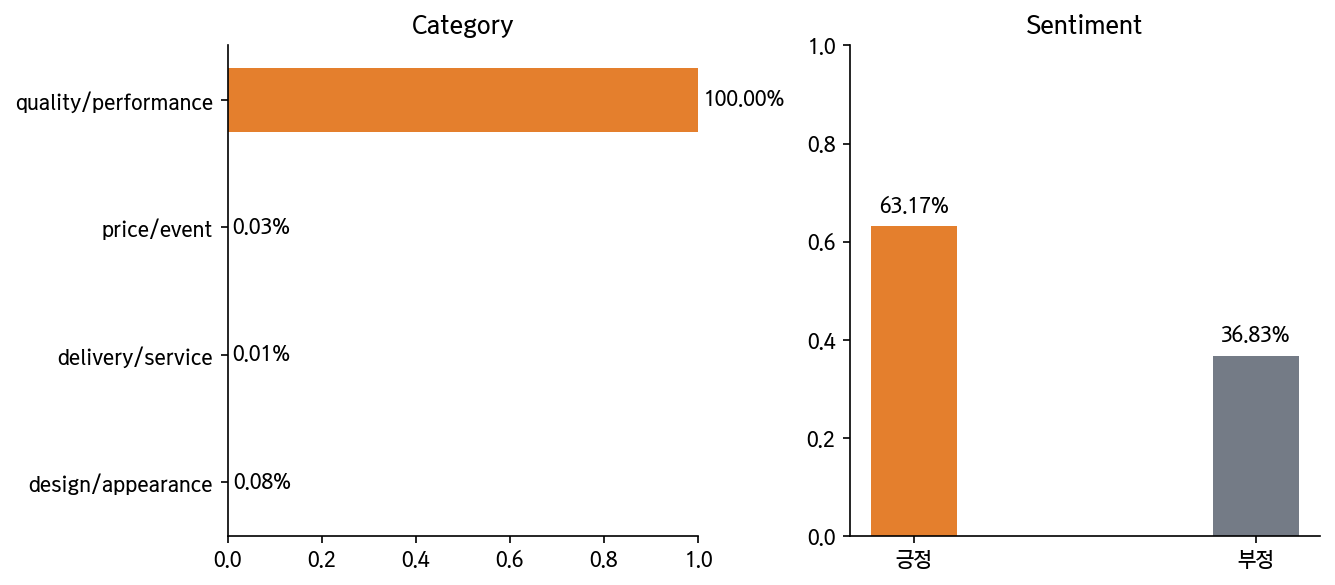

In [30]:
text = "퀄리티 괜찮아요"
predict_review(text)

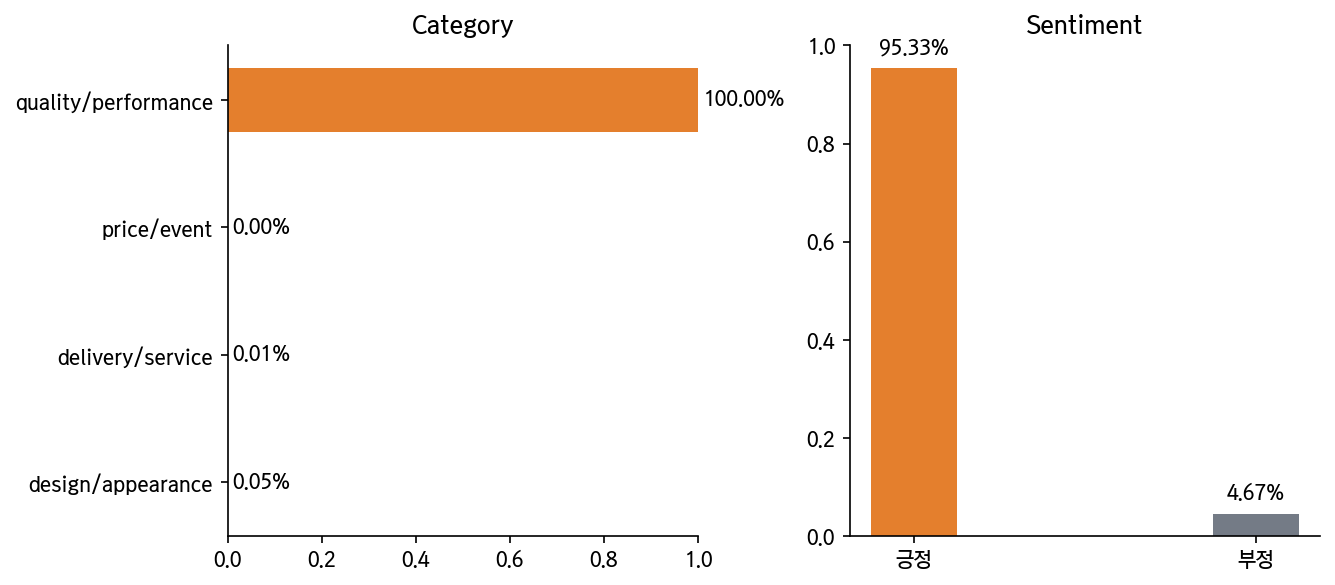

In [35]:
text = "퀄리티 대박 좋아요"
predict_review(text)

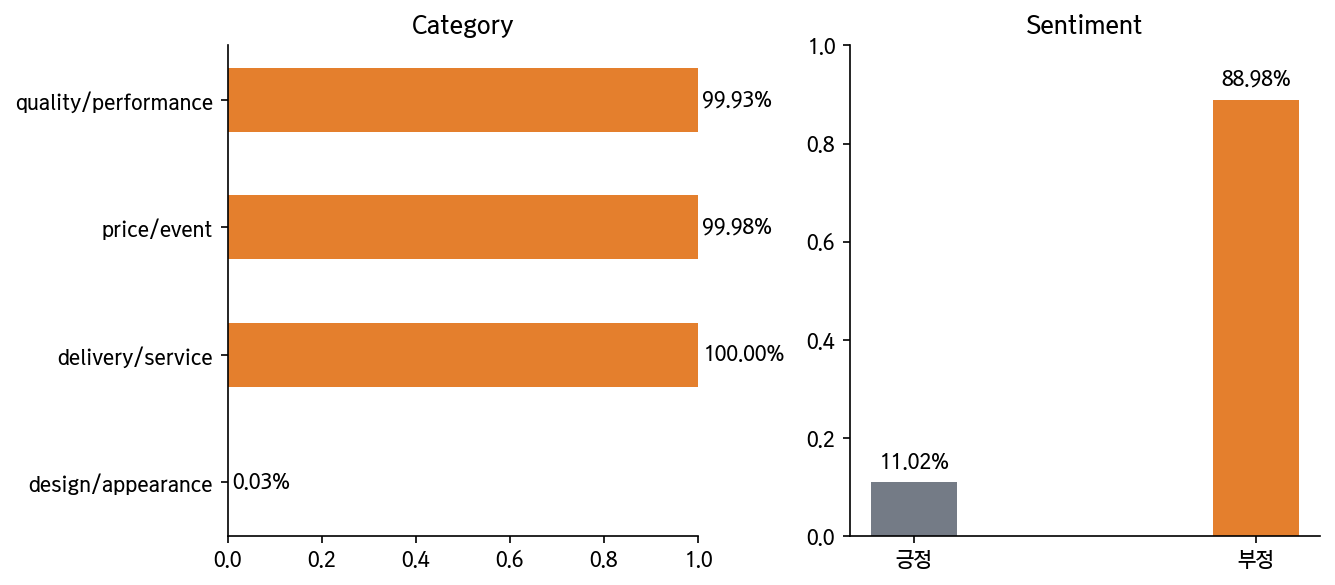

In [52]:
text = "가격 대비 질 좋아요 배송도 빨랐고 포장 상태도 괜찮았어요."
predict_review(text)

In [37]:
text = df['text'][8000]
print(text)

제품 실밥도 많이 풀려있고 허접합니다 크기도 대형인가 싶을 정도로 크진 않네요


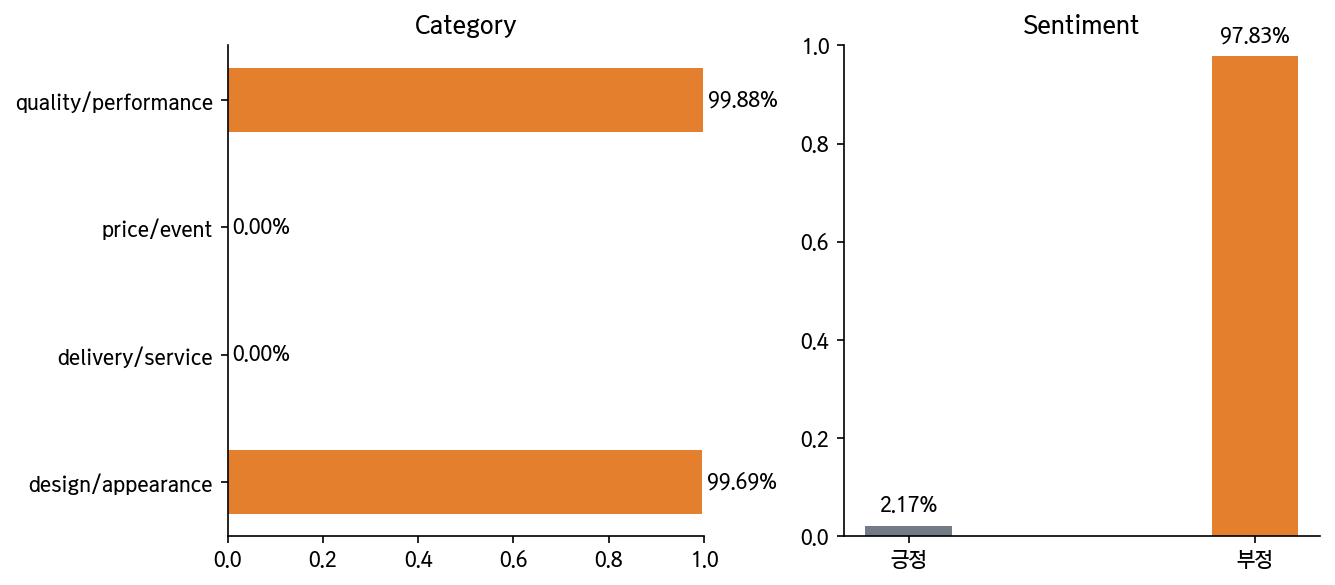

In [55]:
text = "제품 실밥도 많이 풀려있고 허접합니다 크기도 대형인가 싶을 정도로 크진 않네요"
predict_review(text)

In [39]:
text = df['text'][1]
print(text)

택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고


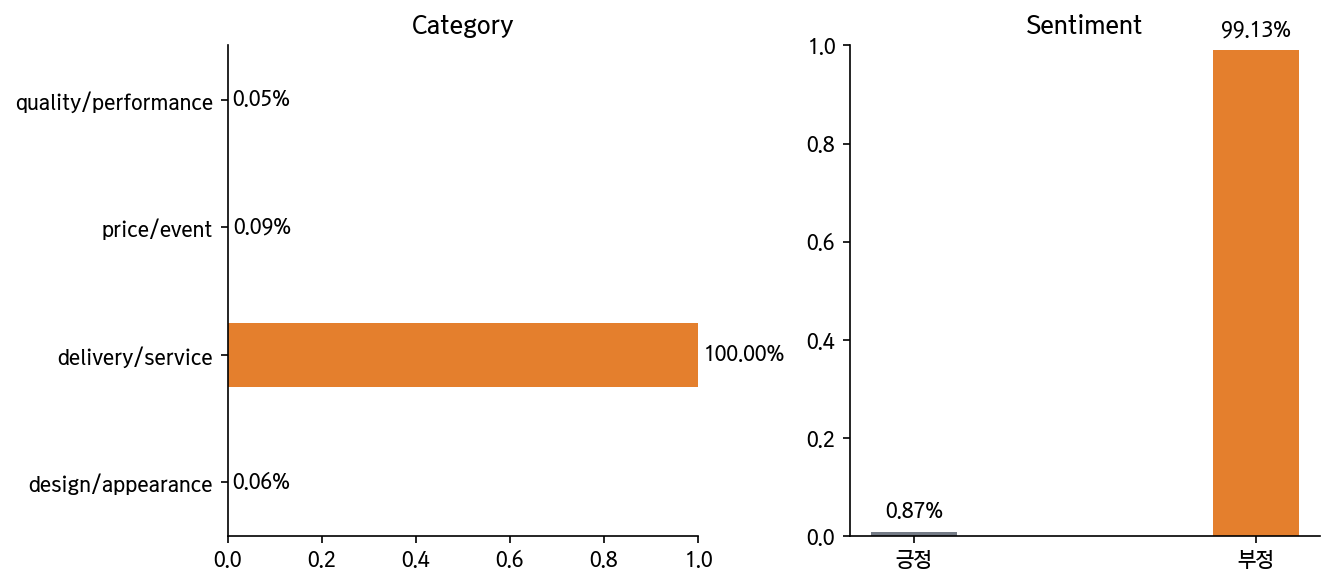

In [40]:
predict_review(text)